## Packages

### Qiskit

In [ ]:
import qiskit

In [ ]:
from qiskit import *

### Other Downloads

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.integrate as integrate

### Plot Histogram

In [ ]:
from qiskit.visualization import plot_histogram, plot_bloch_multivector

### Job Execution

In [ ]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')

qcomp = provider.get_backend('ibmq_qasm_simulator')

job = execute(circuit, backend = qcomp, shots = 1024)

from qiskit.tools.monitor import job_monitor

job_monitor(job)

results = job.result()

plot_histogram(results.get_counts(circuit))

### Statevector Simulation

In [ ]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()

In [ ]:
# Plot vector on Bloch sphere
plot_bloch_multivector(vector)

### List of Providers

In [ ]:
ibmq_qasm_simulator
ibmq_16_melbourne
ibmq_ourense
ibmqx2
ibmq_vigo
ibmq_london
ibmq_burlington
ibmq_essex
ibmq_armonk
ibmq_valencia
ibmq_santiago

### Initialise

In [ ]:
init_gate = Initialize(vector)
init_gate.label = "init"

### Disentangler

In [ ]:
inverse_init_gate = init_gate.gates_to_uncompute()

### Entanglement

In [ ]:
# Define number of qubits and if measurement gates are included

def entanglement(no_qubit = 2, measurement = True):
    
    # Build Circuit
    circuit = QuantumCircuit(no_qubit, no_qubit)
    
    # Put the first qubit into superposition
    circuit.h([0])
    
    # Entangle all other qubit:
    for i in range(no_qubit-1):
        circuit.cx([i], [i+1])
        
    if measurement:    
        circuit.measure(list(range(no_qubit)), list(range(no_qubit)))
    
    return circuit

### Adding Circuit

Circuit with the same shape can be added together. The order in the addition determines the order of the circuit.

### Multiple Qubits Operations

The unitary simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit.

### Encoding Information

All qubit has default of 0. To encode 1, 
1. Add a X gate to the respective value
2. Add a X gate to a qubit and use CX to encode other qubits

### Transfering values

Use this to transfer bit from one qubit to another. This is done with a CNOT control on the transfer, and a default target.

In [ ]:
circuit = QuantumCircuit(2, 2)

circuit.x(0)
circuit.cx(0, 1)

circuit.measure(1, 1)

%matplotlib inline
circuit.draw(output = 'mpl')

### Toffoli Gate (CCX)

When the target is 0, CCX acts as AND gate.
When the target is 1, CCX acts as NAND gate.

## Math

### Constants and Trig Functions

In [ ]:
# Import both packages together
import numpy as np

pi = np.pi
cos = lambda theta: np.cos(theta)
sin = lambda theta: np.sin(theta)

### 0, 1 Vectors

In [ ]:
zero = np.array([[1], [0]])
one = np.array([[0], [1]])

### Bell State

In [ ]:
bell = 1/np.sqrt(2)*np.array([[1], [0], [0], [1]])

### Pauli Matrices

In [ ]:
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

### Hadamard Gate

In [ ]:
H = 1/np.sqrt(2)*np.array([[1, 1], [1, -1]])

### Rx, Ry, Rz gate as 2 by 2 matrices

In [ ]:
Rx_2 = lambda theta: np.array([[np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)]])
Ry_2 = lambda theta: np.array([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]])
Rz_2 = lambda theta: np.array([[np.exp(-1j*theta/2), 0], [0, np.exp(1j*theta/2)]])

### Qubit state vector

In [ ]:
qubit_vector = lambda theta, phi: np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

### Rx, Ry, Rz gate as 3 by 3 matrices

In [ ]:
Rx_3 = lambda theta: np.array([[1, 0, 0], [0, np.cos(theta), -np.sin(theta)], [0, np.sin(theta), np.cos(theta)]])
Ry_3 = lambda theta: np.array([[np.cos(theta), 0, np.sin(theta)], [0, 1, 0], [-np.sin(theta), 0, np.cos(theta)]])
Rz_3 = lambda theta: np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])

### Unit Bloch vector

In [ ]:
Bloch_vector = lambda theta, phi: np.array([[np.cos(phi)*np.sin(theta)], [np.sin(phi)*np.sin(theta)], [np.cos(theta)]])

### Comparison between two approaches

In [ ]:
initial_theta = 0
phi = 0

q = qubit_vector(initial_theta, phi)
b = Bloch_vector(initial_theta, phi)

theta = 0

Ry_2(theta) @ q
Ry_3(theta) @ b

### CNOT Gate

In [ ]:
CNOT = np.matrix([[1, 0, 0, 0], 
                  [0, 1, 0, 0], 
                  [0, 0, 0, 1],
                  [0, 0, 1, 0]])

### Testing Decorator

Test how many times the function runs correctly

In [ ]:
def check(iteration):
    def start_end_decorator(func):

        def wrapper(*args, **kwargs):
            good = 0
            for i in range(iteration):
                if func(*args, **kwargs):
                    good+=1
            print(f"{good*100/iteration}%")
        return wrapper
        
    return start_end_decorator

### Quantum Oracle Matrix from Boolean Functions ($x^n$ and $y^m$)

In [ ]:
def padding(binary, target): # Helps creating binary number with same length with x_0 major and so on
    binary_new = binary.replace('0b', '')
    pad = '0' * (target - len(binary_new))
    binary_final = pad + binary_new
    
    return binary_final

def ket(num, bi = False, length = 1): # create a CBS representation of a binary
    
    if not bi:
        num = padding(str(bin(num)), length)
        
    ket = [zero if i == '0' else one for i in num]
    return tensor(*ket)

def tensor(*matrix): # tensor all the input vectors
    m = 1
    for i in matrix:
        m = np.kron(m, i)
        
    return m
    
def sub_matrix(binary): # Create a submatrix for each x
    matrices = [I if i == '0' else X for i in binary]
    return tensor(*matrices)

def oracle(m, f_x):  # m: size of target, n, size of target, f_x: len 2^n
    
    n = int(np.log2(len(f_x)))
    
    U_f = np.concatenate([np.kron(ket(num = i, length = n), sub_matrix((padding(bin(int(f_x[i])), m)))) for i in range(2**n)], axis = 1)
        
    return U_f

### Testing

In [ ]:
counter = 0

for _ in range(100):
    
    n = random.randint(1, 3) 
    x = random.randint(0, 2**n-1)

    y = 0
    m = random.randint(1, 3)
    
    
    f = ''.join([str(random.randint(0, 2**m-1)) for i in range(2**n)])

    U_f = oracle(m, f)

    test1 = U_f @ tensor(ket(x, length = n), ket(y, length = m))
    test2 = tensor(ket(x, length = n), ket(int(f[x]), length = m))

    if np.all(test1 == test2):
        counter +=1
        
if counter == 100:
    print(True)
else:
    print(False)

### Bernstein-Vazirani Problem Amplitude Checker

The algorithm goes through $2^n$ state. If z == a, the amplitude contructively interfere to 1

In [ ]:
def padding(binary, target): # Helps creating binary number with same length with x_0 major and so on
    binary_new = binary.replace('0b', '')
    pad = '0' * (target - len(binary_new))
    binary_final = pad + binary_new
    
    return binary_final

def amplitude(n, a):  # n is is the number of bit, a is the string of binary
    
    amplitude = []
    
    mod_2_dot = lambda a, b: np.sum(np.multiply(a, b))%2
    
    a = np.array([int(i) for i in a])
    
    # First summation
    sum_z = 0
    for index_z in range(2**n):
        
        z = padding(bin(index_z),n) #str
        z = np.array([int(i) for i in z])
        
        sum_y = 0
        
        b = np.bitwise_xor(a, z)
        
        for index_y in range(2**n):
        
            y = padding(bin(index_y),n) #str
            y = np.array([int(i) for i in y])
            
            top = mod_2_dot(y, b)
            
            sum_y += (-1)**top
            
        amplitude.append((z, int(sum_y/2**n)))
        
    return amplitude

### $2^k$ Periodic Functions

Periodic function of has one collapsible bit to a constant and everything else a variable

In [ ]:
x = []
y = []

n = 5 # number of elements
a = 8 # period of the function 2^k (Note that max period is 2^(n-1))
c = '1' # value at the collapse bit


c_k = n - int(np.log2(a))-1 # Calculate index position of the constant

for i in range(2**n):
    x.append(int(padding(bin(i), n), 2))
    y.append(int(''.join([c if _ == c_k else padding(bin(i), n)[_] for _ in range(n)]), 2))
    
plt.plot(x, y) # Graph the period

### Classical Period Calculation (Simon's Algorithm)

Period calculation of Simon's algorithm from orthogonal vectors

In [ ]:
def calculate_period(n, period): # n is the number of bit, period is an integer <= 2**n

    ortho_list = []

    b = np.array([int(elem) for elem in padding(bin(period), n)])
    for i in range(1, 2**n):

        a = np.array([int(elem) for elem in padding(bin(i), n)])

        if np.all(mod_2_dot(a, b) == 0):
            ortho_list.append(a)
            
    # This part is used calculate the period providing the list of orthogonal matrix
    
    m = np.zeros((n, n))

    for vector in ortho_list: # This follows the new Linear Independence Method

        complete = False

        while not complete:

            if np.argwhere(vector).size != 0:

                index = np.argwhere(vector)[0][0]

                if m[index][index] == 0:
                    m[index] = vector
                    complete = True
                else: 
                    vector = np.bitwise_xor(vector, m[index].astype('int64'))
            else:
                complete = True

    for i in range(n):
        if m[i][i] == 0:

            ld = np.zeros(n)
            ld[i] = 1
            m[i] = ld

    # m is the matrix, ld.reshape((n,1)) is the solution vector
    # Test if the calculation is correct
    # The period is calculated normally using an inverse matrix, and the result is mod 2 to get rid of any negative or 2
    
    return (np.all(np.mod(inv(m) @ ld.reshape((n,1)), 2) == b.reshape((n,1)))) # Calculate Period
            
# Testing
good = 0
for i in range(100):
    
    n = random.randint(2, 10)
    period = random.randint(1, 2**n-1)
    if calculate_period(n, period):
        good +=1
        
print(f"{good}%")

### Fourier Series Spectrum

__Trigonometric Form__ $f(x) = \frac{1}{2} a_0 + \sum^{\infty}_{n=1} a_n cos(nx) + \sum^{\infty}_{n=1} a_n sin(nx)$, where

$a_0 = \frac{1}{L} \: \int^{L}_{-L} f(x) \: dx \:(n = 0)$

$a_n = \frac{1}{L} \: \int^{L}_{-L} f(x) \: cos(n\frac{\pi x}{L})\: dx \:(n > 0)$

$b_n = \frac{1}{L} \: \int^{L}_{-L} f(x) \: sin(n\frac{\pi x}{L})\: dx \:(n < 0)$

<br>

__Exponential Form__ $f(x) = \sum^{\infty}_{-\infty} c_n e^{inx}$, where

$c_n = \frac{1}{2 \sigma \pi n}\int^{\sigma n}_{-\sigma n} f(x) e^{\frac{-inx}{\sigma}} dx$, with $L = \sigma \pi$

In [1]:
pi = np.pi

def FS(lb, ub, no_point, sigma = 0):  # Lower Bound, Upper Bound, Number of Points, Support Width
    def start_end_decorator(func):

        def wrapper(*args, **kwargs):
            
            # Plot function
            x_cont = np.arange(lb, ub+(ub-lb)/no_point, (ub-lb)/no_point)
            y = tuple(map(func, x_cont))
            
            x = np.arange(int(lb), int(ub)+1, 1)  # Integer values only
            
            # Calculate Fourier Series Coefficients 
            
            # Midline
            a_0 = (1/(2*pi))* integrate.quad(lambda t: func(t), -(sigma*pi), (sigma*pi))[0]
            
            # Trigonometric Method
            a_n = lambda n: (1/(sigma*pi))* integrate.quad(lambda x: func(x) * np.cos(n*x/sigma), -(sigma*pi), (sigma*pi))[0]
            b_n = lambda n: (1/(sigma*pi))* integrate.quad(lambda x: func(x) * np.sin(n*x/sigma), -(sigma*pi), (sigma*pi))[0]
            
            # Exponential Method (never use it's 10 times slower!)
            '''a_n = lambda n: (1/(sigma*pi))* quadpy.quad(lambda x: func(x) * np.exp(1j*n*x/sigma), -(sigma*pi), (sigma*pi))[0].real
            b_n = lambda n: (1/(sigma*pi))* quadpy.quad(lambda x: func(x) * np.exp(1j*n*x/sigma), -(sigma*pi), (sigma*pi))[0].imag'''
            
            y_cos = tuple(map(a_n, x))
            y_sin = tuple(map(b_n, x))
            
            # Plot Graph
            ax = plt.gca() 
            ax.spines['top'].set_color('none')
            ax.spines['bottom'].set_position('zero')
            ax.spines['left'].set_position('zero')
            ax.spines['right'].set_color('none')
            
            ax.stem(x, y_cos, linefmt = 'C0-', markerfmt='C0 ', basefmt = ' ', use_line_collection = True)
            ax.stem(x, y_sin, linefmt = 'g:', markerfmt='g ', basefmt = ' ', use_line_collection = True)
            
            plt.hlines(a_0, int(lb), int(ub)+1, colors = 'C1', linestyles = 'dashed', label = 'a_0')
            '''plt.plot(x_cont, y, color = 'brown', label = 'f')'''
            plt.scatter(x, y_cos, color = 'C0', label = 'cos')
            plt.scatter(x, y_sin, color = 'green', label = 'sin')
            
            plt.legend(bbox_to_anchor=(0, 1), loc='best')
            plt.show()
            
            
            return 0
        return wrapper
        
    return start_end_decorator

NameError: name 'np' is not defined

__Draw Function__

<IPython.core.display.Javascript object>


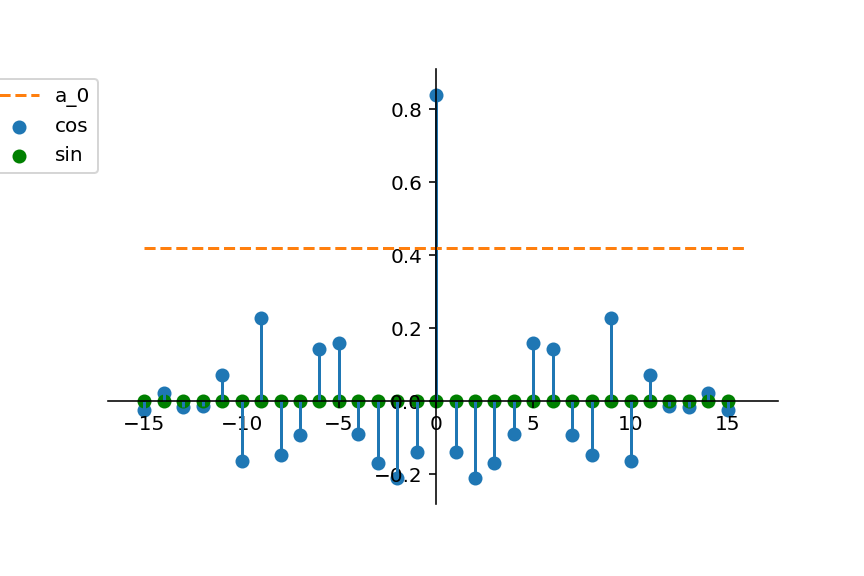

0

In [52]:
%matplotlib notebook
matplotlib.use('nbagg')

f = lambda x: np.sin(x**2)**2# Insert function here

sigma = 1 # Support Width
no_point = 500 # Number of points
display_width = 5 # Display Width

@FS(-display_width*np.pi, display_width*np.pi, no_point, sigma)
def func(x = 0):
    return f(x)

func()

### Continuous Fourier Transform

__Fourier Transform__

$F(s) = \frac{1}{\sqrt{2 \pi}} \int^{\infty}_{-\infty} f(x) \: e^{-isx} dx$

Functions must be absolutely integrable:

$\int^{\infty}_{-\infty} |f(x)| \: dx < \infty$

In [1]:
e = np.e
pi = np.pi

def CFT(lb, ub, no_point):  # Lower Bound, Upper Bound, Number of Points, Support Width
    def start_end_decorator(func):

        def wrapper(*args, **kwargs):
            
            # Plot function
            x = np.arange(lb, ub+(ub-lb)/no_point, (ub-lb)/no_point)
            y = tuple(map(func, x))
            
            '''if integrate.quad(lambda x: abs(func(x)), -np.inf, np.inf)[0] == np.inf:
                return 'not absolute integrable' '''
            
            # Calculate Fourier Transform Coefficients 
            
            # Trigometric Method
            cos_term = lambda s: (1/np.sqrt(2*pi))* integrate.quad(lambda x: func(x) * np.cos(s*x), -np.inf, np.inf)[0]
            sin_term = lambda s: (1/np.sqrt(2*pi))* integrate.quad(lambda x: func(x) * np.sin(s*x), -np.inf, np.inf)[0]

            y_cos = tuple(map(cos_term, x))
            y_sin = tuple(map(sin_term, x))

            y_magnitude = tuple(map(lambda x, y: abs(x-1j*y), y_cos, y_sin))
            y_phase = tuple(map(lambda x, y: np.angle(x-1j*y), y_cos, y_sin))
            
            # Exponential Method (never use it's 10 times slower!)
            '''magnitude = lambda s: (1/np.sqrt(2*pi))* abs(quadpy.quad(lambda x: func(x) * np.exp(1j*s*x), -np.inf, np.inf)[0])
            phase = lambda s: (1/np.sqrt(2*pi))* np.angle(quadpy.quad(lambda x: func(x) * np.exp(1j*s*x), -np.inf, np.inf)[0]) * pi
            
            y_magnitude = tuple(map(magnitude, x))
            y_phase = tuple(map(phase, x))'''
            
            # Plot Graph
            ax = plt.gca() 
            ax.spines['top'].set_color('none')
            ax.spines['bottom'].set_position('zero')
            ax.spines['left'].set_position('zero')
            ax.spines['right'].set_color('none')
            
            plt.plot(x, y, color = 'brown', label = 'f(x)')
            plt.plot(x, y_magnitude, 'C0--', label = 'magnitude')
            plt.plot(x, y_phase, 'C2:', label = 'phase')
            
            plt.legend(bbox_to_anchor=(0, 1), loc='best')
            plt.show()
            
            
            return 0
        return wrapper
        
    return start_end_decorator

NameError: name 'np' is not defined

Draw Function

<IPython.core.display.Javascript object>


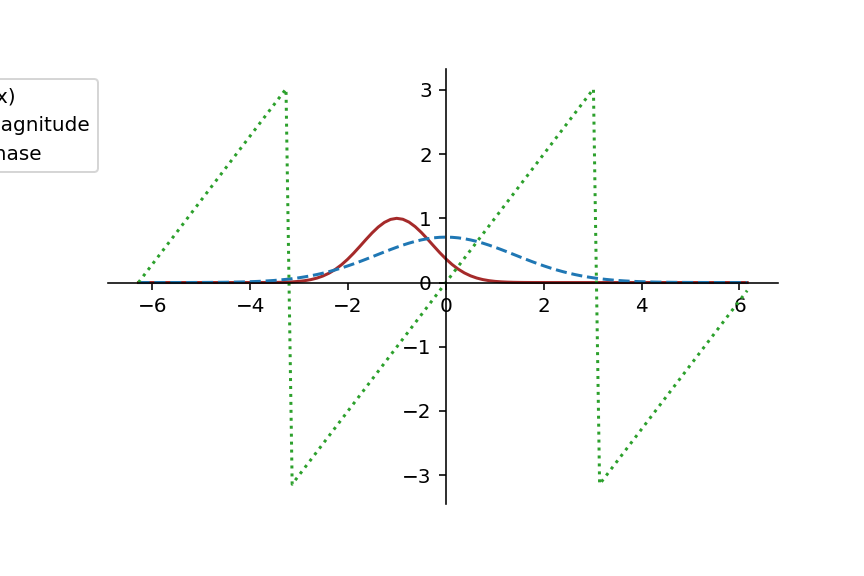

0

In [55]:
%matplotlib notebook
matplotlib.use('nbagg')

f = lambda x: e**(-(x+1)**2)# Insert Function here

no_point = 100 # Number of points
display_width = 2 # Display Width

@CFT(-display_width*pi, display_width*pi, no_point)
def func(x = 0):
    return f(x)

func()

### Maybe FFT

In [ ]:
pi = np.pi

def FFT(lb, ub, no_point, sigma = 0):  # Lower Bound, Upper Bound, Number of Points, Support Width
    def start_end_decorator(func):

        def wrapper(*args, **kwargs):
            
            # Plot function
            x = np.arange(lb, ub+(ub-lb)/no_point, (ub-lb)/no_point)
            y = tuple(map(func, x))
            
            # Calculate Fourier Series Coefficients 
            
            y_magnitude = abs(np.fft.fft(y))
            y_phase = np.angle(np.fft.fft(y))
            
            # Plot Graph
            ax = plt.gca() 
            ax.spines['top'].set_color('none')
            ax.spines['bottom'].set_position('zero')
            ax.spines['left'].set_position('zero')
            ax.spines['right'].set_color('none')
            
            ax.stem(x, y_magnitude, linefmt = 'C0-', markerfmt='C0 ', basefmt = ' ', use_line_collection = True)
            # ax.stem(x, y_phase, linefmt = 'g:', markerfmt='g ', basefmt = ' ', use_line_collection = True)
            
            plt.plot(x, y)
            
            plt.scatter(x, y_magnitude, color = 'C0', label = 'magnitude')
            # plt.scatter(x, y_phase, color = 'green', label = 'phase')
            
            plt.legend(bbox_to_anchor=(0, 1), loc='best')
            plt.show()
            
            
            return 0
        return wrapper
        
    return start_end_decorator

%matplotlib notebook
matplotlib.use('nbagg')

f = lambda x: np.sin(x)# Insert Function here

no_point = 16 # Number of points
display_width = 1 # Display Width

@FFT(-display_width*pi, display_width*pi, no_point)
def func(x = 0):
    return f(x)

func()